In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [5]:
# importing trianiing and testing data
df_train=pd.read_csv("C:\\Users\\RAVISANKAR P K\\Desktop\\Flip Robo\\Malignant- Comment-Classifier\\me\\train.csv")
df_test = pd.read_csv("C:\\Users\\RAVISANKAR P K\\Desktop\\Flip Robo\\Malignant- Comment-Classifier\\me\\test.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
print("The no. of Rows in dataset is: ",df_train.shape[0],"and no. of columns is ",df_train.shape[1])

The no. of Rows in dataset is:  159571 and no. of columns is  8


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# droping unnecessary column
df_train.drop("id",axis=1,inplace=True)

<AxesSubplot:xlabel='malignant', ylabel='count'>

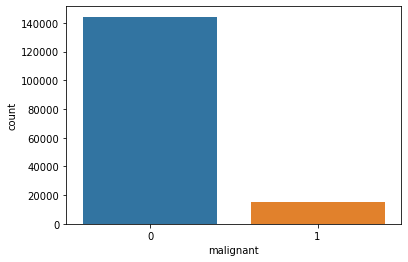

In [10]:
# we see very low prpobabliy of comment being malignant
sns.countplot(df_train["malignant"])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

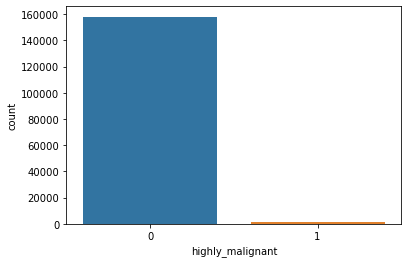

In [11]:
# we see very low prpobabliy of comment being malignant
sns.countplot(df_train["highly_malignant"])

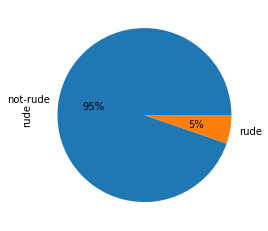

In [12]:
# we see very low prpobabliy of comment being malignant
df_train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

<AxesSubplot:xlabel='threat', ylabel='count'>

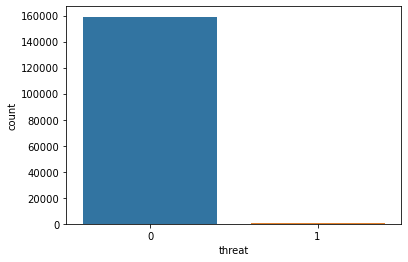

In [13]:
# we see very low prpobabliy of comment being malignant
sns.countplot(df_train["threat"])

<AxesSubplot:xlabel='abuse', ylabel='count'>

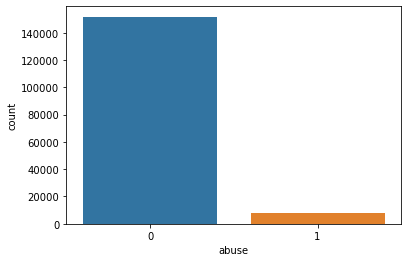

In [14]:
# we see very low prpobabliy of comment being malignant
sns.countplot(df_train["abuse"])

<AxesSubplot:xlabel='loathe', ylabel='count'>

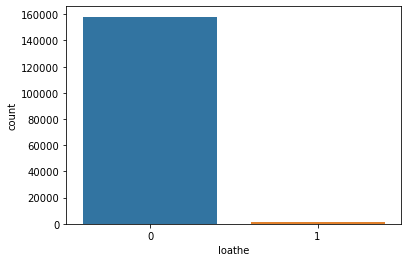

In [15]:
# we see very low prpobabliy of comment being malignant
sns.countplot(df_train["loathe"])

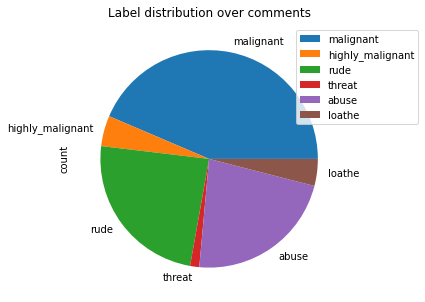

In [16]:
#checking how which comment fall under which category
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

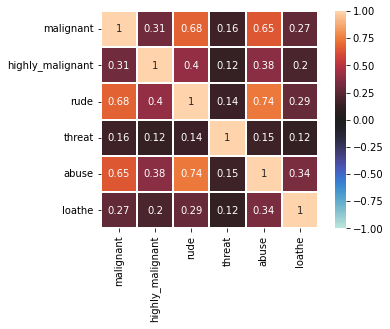

In [17]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

In [18]:
#checking length of document
df_train["original_len"] = df_train["comment_text"].str.len() 

In [19]:
#converting all letter to lower case
df_train["comment_text"] = df_train["comment_text"].str.lower()

In [20]:
#replacing with email address
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#replacing with web address                                                 
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#replacing with number
df_train["comment_text"]= df_train["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#remove  punctation
df_train["comment_text"]=df_train["comment_text"].str.replace(r'[^\w\d\s]'," ")

# replace extra space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+'," ")

#replacing leadning and trailing white space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$', "")

#removing \n
df_train["comment_text"]=df_train["comment_text"].str.replace("\n"," ")


# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_train["comment_text"]= df_train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [21]:
#checking clean length
df_train["clean_len"] = df_train["comment_text"].str.len() 

In [22]:
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,match background colour seemingly stuck thanks...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [23]:
# making one target column 
df_train["label"]=df_train["malignant"] | df_train["highly_malignant"] | df_train["rude"] | df_train["threat"] | df_train["abuse"] | df_train["loathe"]

In [24]:
print('original length',df_train.original_len.sum())
print('cleaned length',df_train.clean_len.sum())

original length 62893130
cleaned length 40149092


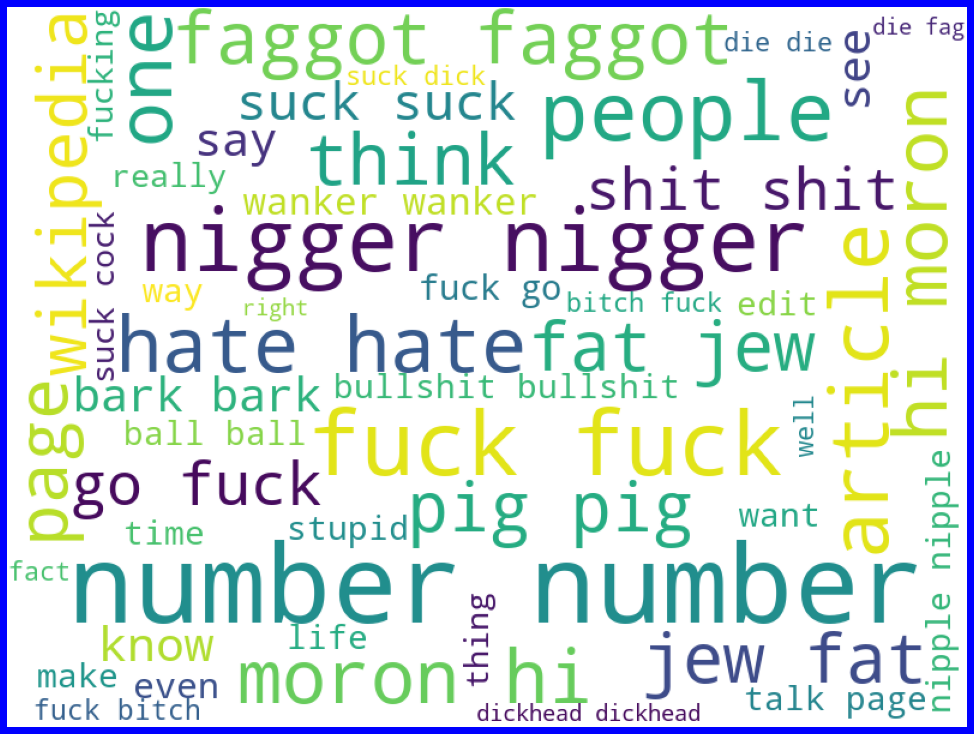

In [25]:
# seeing the word which are offensive
from wordcloud import WordCloud

malignant=df_train["comment_text"][df_train["label"]==1]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

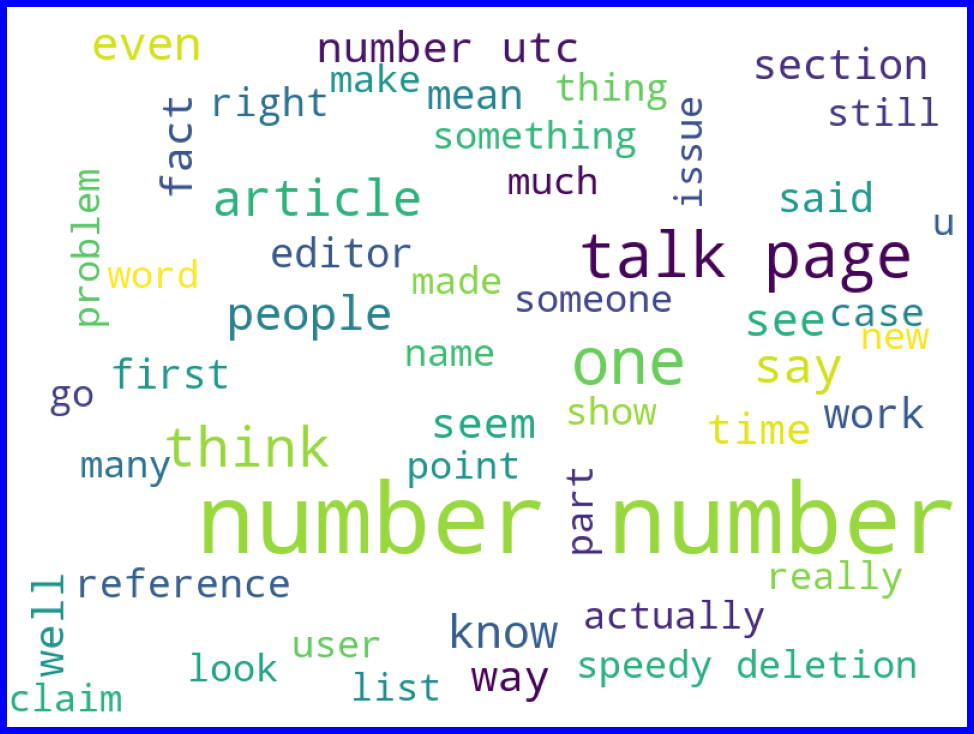

In [26]:
# seeing the word which are not offensive
from wordcloud import WordCloud

non_malignant=df_train["comment_text"][df_train["label"]==0]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(non_malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# testing data

In [27]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [28]:
print("The no. of Rows in dataset is: ",df_test.shape[0],"and no. of columns is ",df_test.shape[1])

The no. of Rows in dataset is:  153164 and no. of columns is  2


In [29]:
df_test.drop("id",axis=1,inplace=True)

In [30]:
df_test["comment_text"] = df_test["comment_text"].str.lower()

In [31]:
df_test["original_len"] = df_test["comment_text"].str.len() 

In [32]:
df_test.head()

,comment_text,original_len
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41


In [33]:
#replacing with email address
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#replacing with web address                                                   
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#replacing with number
df_test["comment_text"]= df_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#remove  punctation
df_test["comment_text"]=df_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

# replace extra space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+'," ")

#replacing leading and trailing white space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

#replacing with\n
df_test["comment_text"]=df_test["comment_text"].str.replace("\n"," ")

# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_test["comment_text"]= df_test["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))


In [34]:
df_test["clean_len"] = df_test["comment_text"].str.len() 

In [35]:
df_test.head()

,comment_text,original_len,clean_len
0,yo bitch rule succesful ever whats hating sad ...,367,221
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [36]:
print('original length',df_test.original_len.sum())
print('cleaned length',df_test.clean_len.sum())

original length 55886104
cleaned length 35617170


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [38]:
#using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value
tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)

# LogisticRegression

In [40]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

In [41]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [42]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9561075877973579 
 cross validation score : 0.9541646025444619 
 logloss: 1.5159935978606356


In [43]:
confusion_matrix(y_test,y_pred)

array([[35688,   169],
       [ 1582,  2454]], dtype=int64)

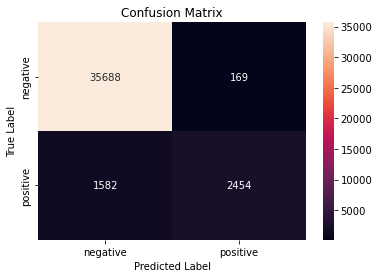

In [44]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
accuracy = []
cross_val = []
diff = []
logloss=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# AdaBoostClassifier

In [46]:
dt= AdaBoostClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [47]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     35857
           1       0.88      0.55      0.68      4036

    accuracy                           0.95     39893
   macro avg       0.91      0.77      0.82     39893
weighted avg       0.94      0.95      0.94     39893



In [48]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.946782643571554 
 cross validation score : 0.9471207218179667 
 logloss: 1.8380687278164287


In [49]:
confusion_matrix(y_test,y_pred)

array([[35540,   317],
       [ 1806,  2230]], dtype=int64)

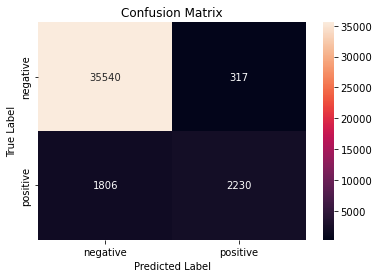

In [50]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# KNeighborsClassifier

In [52]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [53]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     35857
           1       0.51      0.17      0.26      4036

    accuracy                           0.90     39893
   macro avg       0.71      0.58      0.60     39893
weighted avg       0.87      0.90      0.88     39893



In [54]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.899832050735718 
 cross validation score : 0.8880873367931708 
 logloss: 3.459691510058969


In [55]:
confusion_matrix(y_test,y_pred)

array([[35203,   654],
       [ 3342,   694]], dtype=int64)

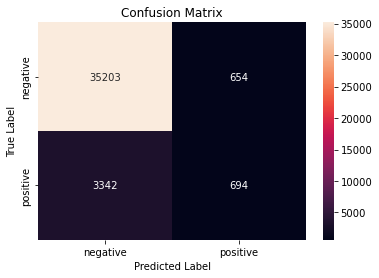

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# MultinomialNB

In [58]:
ad= MultinomialNB()
ad.fit(x_train,y_train)

y_pred=ad.predict(x_test)

In [59]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35857
           1       0.99      0.20      0.34      4036

    accuracy                           0.92     39893
   macro avg       0.95      0.60      0.65     39893
weighted avg       0.93      0.92      0.89     39893



In [60]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(ad,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9193091519815506 
 cross validation score : 0.9169397954074388 
 logloss: 2.786963337216915


In [61]:
confusion_matrix(y_test,y_pred)

array([[35848,     9],
       [ 3210,   826]], dtype=int64)

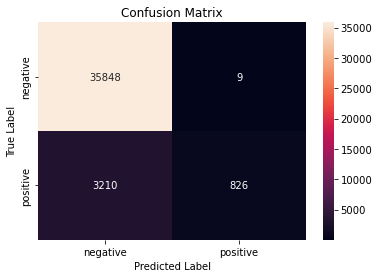

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [64]:
model = ["LogisticRegression","AdaBoostClassifier","KNeighborsClassifier","MultinomialNB"]

In [65]:
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

,MODEL,Accuracy score,Cross_validation_Score,Difference,Logloss
0,LogisticRegression,0.956108,0.954165,0.001943,1.515994
1,AdaBoostClassifier,0.946783,0.947121,-0.000338,1.838069
2,KNeighborsClassifier,0.899832,0.888087,0.011745,3.459692
3,MultinomialNB,0.919309,0.916940,0.002369,2.786963


as the dataset is imbalanced so we select model on the basis of f1 score so logistic turn out to be best model as it showing gooding f1 score

# hyper para meter tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [67]:
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)

In [68]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [69]:
rand_search.best_params_

{'warm_start': False, 'random_state': 70, 'dual': False}

In [70]:
lr= LogisticRegression(warm_start=False,random_state=70,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)

In [71]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(lr,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9561326548517284 
 Cross_validation_Score : 0.9541646025444619 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893
 Confusion matrix :
 [[35689   168]
 [ 1582  2454]]


In [72]:
log_loss(y_test,y_pred1)

1.5151277924313036

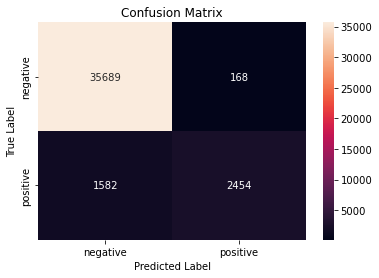

In [73]:
conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [74]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

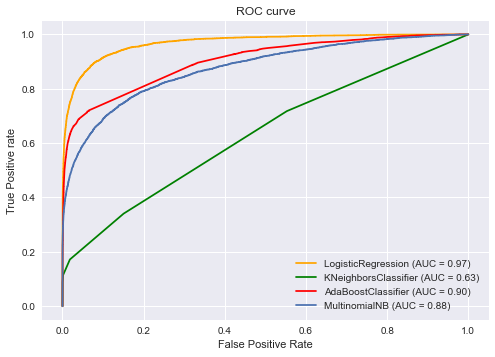

In [75]:
plt.style.use('seaborn')

disp = plot_roc_curve(lr,x_test,y_test,color='orange')
plot_roc_curve(knn,x_test,y_test,color='green',ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,color='red',ax=disp.ax_)
plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

# saving model

In [76]:
import pickle
pickle.dump(lr,open("comment.pk1","wb"))

In [77]:
load_model = pickle.load(open("comment.pk1","rb"))

# verifying model on testing data

In [78]:
testing_data = tf.transform(df_test["comment_text"])

In [79]:
a=lr.predict(testing_data)

In [80]:
pd.DataFrame(a)

,0
0,1
1,0
2,0
3,0
4,0
...,...
153159,1
153160,0
153161,0
153162,0


In [81]:
df_test["label"]=a

In [82]:
df_test

,comment_text,original_len,clean_len,label
0,yo bitch rule succesful ever whats hating sad ...,367,221,1
1,rfc title fine imo,50,18,0
2,source zawe ashton lapland,54,26,0
3,look back source information updated correct f...,205,109,0
4,anonymously edit article,41,24,0
...,...,...,...,...
153159,totally agree stuff nothing long crap,60,37,1
153160,throw field home plate get faster throwing cut...,198,107,0
153161,okinotorishima category see change agree corre...,423,238,0
153162,one founding nation eu germany law return quit...,502,319,0


# saving testing data

In [83]:
df_test.to_csv("M_test.csv")